# Hierarchical

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

*The discriptions in this notebook are mainly based on [sklearn's hierarchical clustering documentation](https://scikit-learn.org/stable/modules/clustering.html)* 

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.

The `AgglomerativeClustering` object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

The **linkage criteria** determines the metric used for the merge strategy:
- **Ward** minimizes the sum of squared differences within all clusters (variance of merged clusters ). It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters.
- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.
- **Single linkage** minimizes the distance between the closest observations of pairs of clusters.

AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

The example below shows characteristics of different linkage methods for hierarchical clustering on datasets that are “interesting” but still in 2D. 

The main observations to make are:
- single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
- average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
- Ward is the most effective method for noisy data.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

 <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png?raw=1">

## Generate Data

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

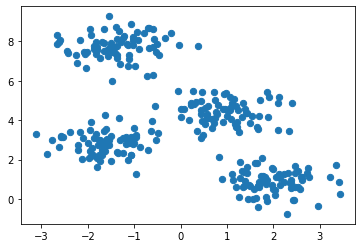

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=40);

## Standardize features

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). In our case the features were generated and standardization is not necessary. However, the standardization process will be performed to demonstrate the procedure ([see sklearn standardscaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler))  

In [3]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Algorithm

In scikit-learn, `AgglomerativeClustering` uses the linkage parameter to determine the merging strategy (e.g. ward).

Two other parameters are useful to know. First, the `affinity` parameter determines the distance metric used for linkage ( “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’ but if linkage is “ward”, only “euclidean” is accepted).

Second, `n_clusters` sets the number of clusters the clustering algorithm will attempt to find. That is, clusters are successively merged until there are only n_clusters remaining.

Source: [Albon, 2017](https://chrisalbon.com/machine_learning/clustering/agglomerative_clustering/)

In [4]:
ward = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=4)
ward.fit(X_std)

AgglomerativeClustering(n_clusters=4)

In [5]:
# Show cluster membership
ward.labels_

array([3, 0, 1, 0, 3, 3, 2, 1, 0, 0, 2, 0, 1, 0, 3, 1, 1, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 1, 1,
       2, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2,
       0, 3, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 3, 1,
       0, 0, 1, 3, 0, 2, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 1, 3, 3, 1, 0, 1,
       2, 2, 3, 0, 3, 1, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2,
       2, 3, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 1, 2, 0,
       3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 1,
       0, 3, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2, 1, 3, 2, 0, 2, 3, 1,
       3, 0, 0, 0, 0, 2, 2, 0, 1, 2, 3, 1, 2, 2, 2, 3, 3, 0, 1, 1, 2, 3,
       0, 2, 1, 0, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 0, 2])

In [6]:
# Use fit_predict to estimate cluster membership
ward.fit_predict(X_std)

array([3, 0, 1, 0, 3, 3, 2, 1, 0, 0, 2, 0, 1, 0, 3, 1, 1, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 1, 1,
       2, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2,
       0, 3, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 3, 1,
       0, 0, 1, 3, 0, 2, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 1, 3, 3, 1, 0, 1,
       2, 2, 3, 0, 3, 1, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2,
       2, 3, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 1, 2, 0,
       3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 1,
       0, 3, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2, 1, 3, 2, 0, 2, 3, 1,
       3, 0, 0, 0, 0, 2, 2, 0, 1, 2, 3, 1, 2, 2, 2, 3, 3, 0, 1, 1, 2, 3,
       0, 2, 1, 0, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 0, 2])

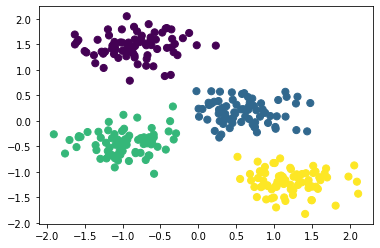

In [7]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=ward.labels_, s=50, cmap='viridis');